# ANA 680 HW 1 Data Expolration Fairbairn
# this is the data exploration portion

In [1]:
#linear regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset. Cells with content “NULL”, “?”, or “NONE” or just blank space will be interpreted as np.NAN
file_path= 'C:/David/ANA 680 Machine Learning Deployment/Data/'
file = file_path + "breast-cancer-wisconsin.csv"
df=pd.read_csv(file, na_values=['NULL', '?', 'NONE'])

In [3]:
df.shape

(699, 11)

In [4]:

df.head(3)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2


In [5]:
df.columns

Index(['id number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
id number,699.0,1071704.10,617095.73,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.42,2.82,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.13,3.05,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.21,2.97,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.81,2.86,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.22,2.21,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.54,3.64,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,699.0,3.44,2.44,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.87,3.05,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.59,1.72,1.0,1.0,1.0,1.0,10.0


# provides info on the number of columns have missing values.  A quick way to get data types and non-null values.

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id number                    699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


## List the unique values for each feature

In [8]:
df.nunique()

id number                      645
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

### look for missing values
#### list columns in a decreasing order of number of missing values. The to_string() is used to display all the rows.

In [9]:
print(df.isnull().sum().sort_values(ascending=False).to_string())

Bare Nuclei                    16
id number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0


## Impiute the mode for missing values of Bare Nuclei

In [10]:
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df['Bare Nuclei'].mode()[0])

In [11]:
print(df.isnull().sum().sort_values(ascending=False).to_string())

id number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0


## encode Class as 0,1 as opposed to 2, 4

<AxesSubplot:>

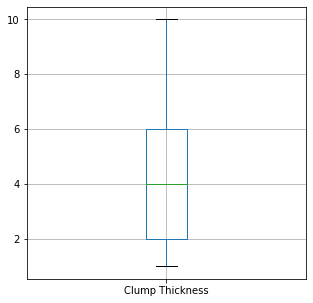

In [12]:
# Can generate boxplot for individual features 
df.boxplot(['Clump Thickness'], figsize=(5, 5))

array([[<AxesSubplot:title={'center':'id number'}>,
        <AxesSubplot:title={'center':'Clump Thickness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>],
       [<AxesSubplot:title={'center':'Uniformity of Cell Shape'}>,
        <AxesSubplot:title={'center':'Marginal Adhesion'}>,
        <AxesSubplot:title={'center':'Single Epithelial Cell Size'}>],
       [<AxesSubplot:title={'center':'Bare Nuclei'}>,
        <AxesSubplot:title={'center':'Bland Chromatin'}>,
        <AxesSubplot:title={'center':'Normal Nucleoli'}>],
       [<AxesSubplot:title={'center':'Mitoses'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

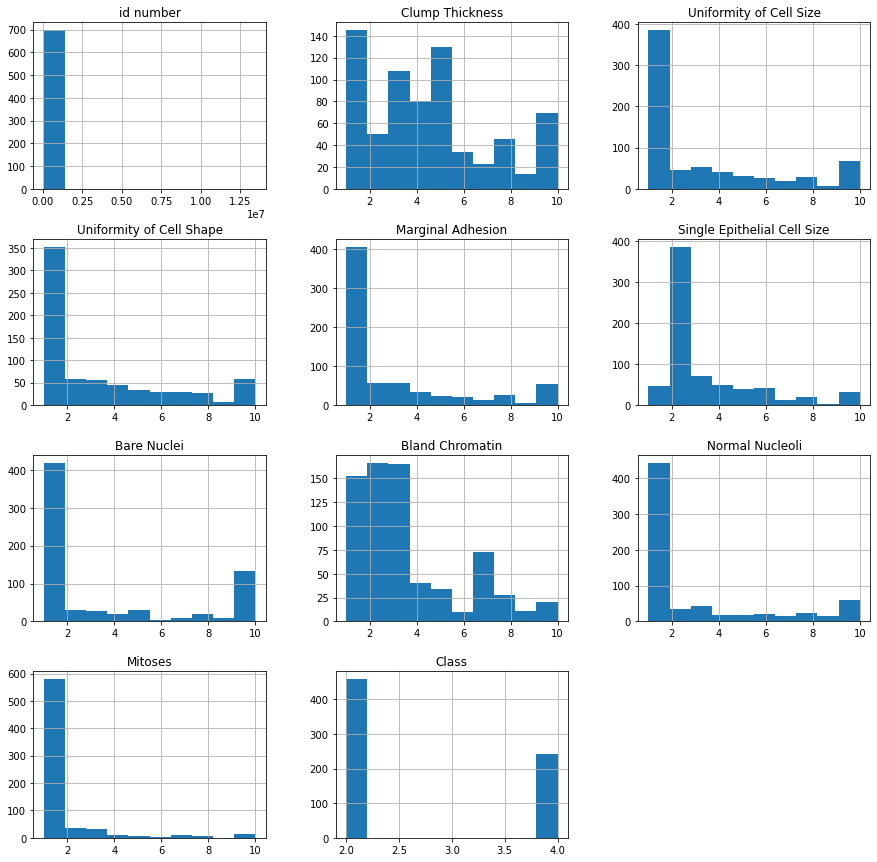

In [13]:
# histogram with specified number of bins
df.hist(bins=10, figsize=(15, 15))

In [14]:

df.info() # provides info on the number of columns have missing values. 
# a quick way to get data types and non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id number                    699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  699 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [15]:
# number of values in "total_bill" categorical feature
df['Class'].value_counts()


2    458
4    241
Name: Class, dtype: int64

## look at the distribution of Class

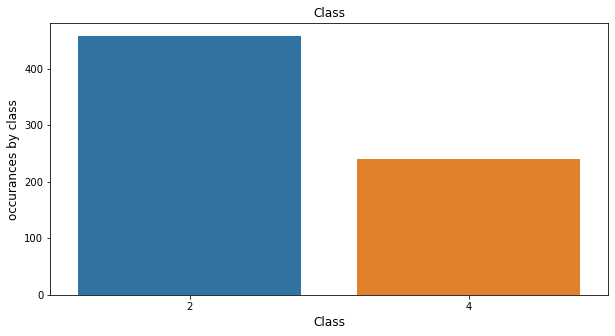

In [16]:
op_count = df['Class'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index,y= op_count.values)
plt.title('Class')
plt.ylabel('occurances by class', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

## Recode Class as 0 = Benign 1 = Malignant

In [17]:
# For this example we use the LabelEncoder
from sklearn.preprocessing import LabelEncoder
lble = LabelEncoder()
df['Class'] = lble.fit_transform(df['Class'].values)  #Benign = 0, mMalignent = 1

df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


## Look at the distribution of class after recoding

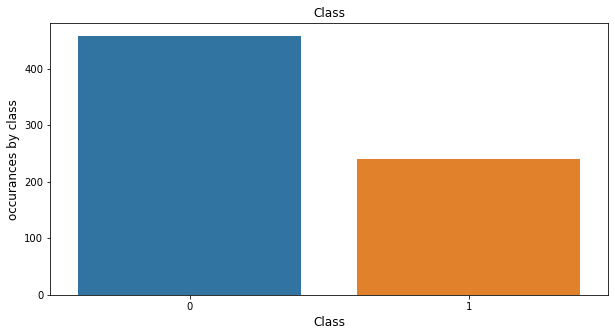

In [18]:
op_count = df['Class'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index,y= op_count.values)
plt.title('Class')
plt.ylabel('occurances by class', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

## Let's examine the categorical features. We can get the number of unique values and the count for the top values. 
## We also get the count of non-null values.
## this dataset has no data of type 'object'

In [19]:
# Let's examine the categorical features. We can get the number of unique values and the count for the top values. 
# We also get the count of non-null values.
#df.select_dtypes(include=['object']).describe().transpose() 

In [20]:
"""
# Get a listing of values in each category
cat=df.select_dtypes('object')
for x in cat:
    print('{} = {}'.format(x, df[x].unique()))
"""

"\n# Get a listing of values in each category\ncat=df.select_dtypes('object')\nfor x in cat:\n    print('{} = {}'.format(x, df[x].unique()))\n"

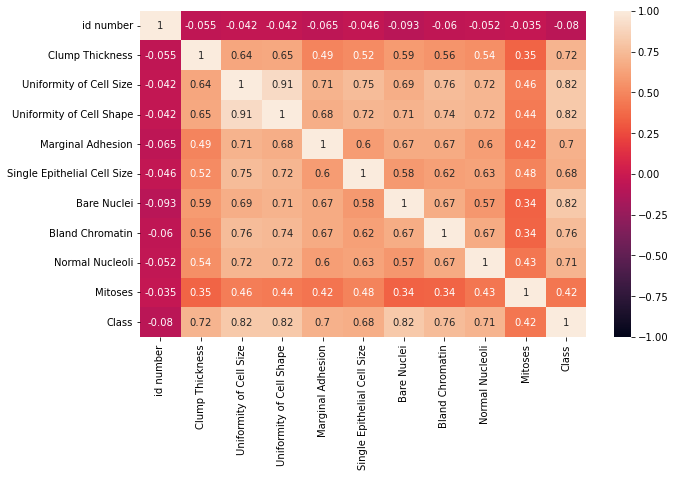

In [21]:
# correlation matrix and heatmap for feature selection
corr=df.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [22]:
print("Most postively correlated features with the target")
corr.sort_values(['Class'], ascending=False, inplace=True)
corr.Class

Most postively correlated features with the target


Class                          1.000000
Bare Nuclei                    0.818968
Uniformity of Cell Shape       0.818934
Uniformity of Cell Size        0.817904
Bland Chromatin                0.756616
Clump Thickness                0.716001
Normal Nucleoli                0.712244
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Mitoses                        0.423170
id number                     -0.080226
Name: Class, dtype: float64

## Save the processed dataframe as a .csv for use in analysis

In [23]:
# saving the dataframe
file = file_path + "breast-cancer-wisconsin-processed.csv"
df.to_csv(file)